In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [305]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)

In [191]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [100]:
df['Gender'] = df.RIAGENDR.replace({1: 'Male', 2: 'Female'})

In [101]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,Smoker?,Gender
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,Yes,Male
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,Yes,Male
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,Yes,Male
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,No,Female
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,No,Female


In [104]:
df['Smoker'] = df.SMQ020.replace({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})

In [106]:
er = df.groupby('Gender')['Smoker'].value_counts(normalize=True)
er

Gender  Smoker
Female  No        0.695155
        Yes       0.304845
Male    Yes       0.513258
        No        0.486742
Name: Smoker, dtype: float64

In [34]:
smoking_data = pd.crosstab(df['Smoker?'], df['RIAGENDRx'])
smoking_data

RIAGENDRx,Female,Male
Smoker?,,
No,2066,1340
Yes,906,1413


In [39]:
smoking_confint = sm.stats.proportion_confint(smoking_data.iloc[1,0], smoking_data.iloc[0,0] + smoking_data.iloc[1,0])

In [44]:
print(f'With 95% confidence the population proportion of women that smokes in the US is between {smoking_confint[0]*100:.2f}% and {smoking_confint[1]*100:.2f}%')



With 95% confidence the population proportion of women that smokes in the US is between 28.83% and 32.14%


In [51]:
# se = sqrt(pp * (1-pp)/n)
pp_f = (smoking_data.iloc[1,0] / (smoking_data.iloc[0,0] + smoking_data.iloc[1,0]))
se = np.sqrt(pp_f*(1 - pp_f)/(smoking_data.iloc[0,0] + smoking_data.iloc[1,0]))
se

0.008444152146214435

In [53]:
low_confint = pp_f - 1.96*se
high_confint = pp_f + 1.96*se
print(f'The population proportion of women who smokes in the US is {pp_f*100:.2f} with confidence interval between {low_confint*100:.2f} and {high_confint*100:.2f}')

The population proportion of women who smokes in the US is 30.48 with confidence interval between 28.83 and 32.14


## Confidence interval for population mean

In [54]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,Smoker?
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,Yes
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,Yes
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,Yes
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,No
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,No


In [55]:
mean_BMI = df.BMXBMI.mean()

In [56]:
sd_BMI = df.BMXBMI.std()

In [60]:
se_BMI = sd_BMI/np.sqrt(len(df['BMXBMI']))

In [61]:
print(f'Mean = {mean_BMI}, standard deviation = {sd_BMI} and standard error = {se_BMI}')

Mean = 29.38219710349705, standard deviation = 7.095920957539856 and standard error = 0.09370053230042678


In [62]:
lower_CI_BMI = mean_BMI - 1.96*se_BMI
upper_CI_BMI = mean_BMI + 1.96*se_BMI

In [63]:
print(f'The confidence interval of the BMI mean in the US is in between {lower_CI_BMI:.2f} and {upper_CI_BMI:.2f}')

The confidence interval of the BMI mean in the US is in between 29.20 and 29.57


In [80]:
df_BMI = df['BMXBMI'].dropna()
type(df_BMI)

pandas.core.series.Series

In [81]:
sm.stats.DescrStatsW(df_BMI).zconfint_mean()

(29.197367331536523, 29.567026875457476)

In [75]:
female_bmi = df.loc[df.RIAGENDRx=="Female", "BMXBMI"].dropna()
female_bmi

3       42.4
4       20.3
5       28.6
7       28.2
12      26.6
        ... 
5724    20.9
5727    28.1
5730    21.5
5732    31.0
5734    21.4
Name: BMXBMI, Length: 2944, dtype: float64

In [76]:
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)

In [82]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,Smoker?
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,Yes
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,Yes
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,Yes
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,No
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,No


In [87]:
df_agg = df.groupby(df['RIAGENDR']).agg({df['BMXBMI'], np.mean})

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Text(0, 0.5, 'Female - male smoking proportion')

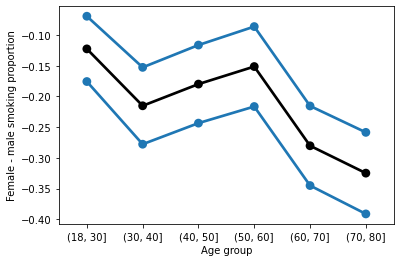

In [151]:
import seaborn as sns
# Calculate the smoking rates within age/gender groups
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = df.groupby(["agegrp", "RIAGENDRx"]).agg({"Smoker": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = df.groupby(["agegrp", "RIAGENDRx"]).agg({"Smoker": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

In [112]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])


In [115]:
pr = df.groupby(["agegrp", "RIAGENDRx"]).agg({"Smoker": lambda x: np.mean(x=="Yes")}).unstack()

In [149]:
dn = df.groupby(["agegrp", "RIAGENDRx"]).agg({"Smoker": np.size}).unstack()
dn.columns = ["Female", "Male"]
dn

,Female,Male
agegrp,,
"(18, 30]",609,544
"(30, 40]",474,458
"(40, 50]",502,401
"(50, 60]",470,454
"(60, 70]",441,437
"(70, 80]",410,402


In [131]:
pr2 = df.groupby(["agegrp", "RIAGENDRx"]).agg({'Smoker': lambda x: np.mean(x == 'Yes')}).unstack()
pr2

Smoker          
RIAGENDRx    Female      Male
agegrp                       
(18, 30]   0.226601  0.349265
(30, 40]   0.286920  0.502183
(40, 50]   0.268924  0.448878
(50, 60]   0.421277  0.572687
(60, 70]   0.374150  0.654462
(70, 80]   0.324390  0.649254

In [139]:
np.mean(df['SMQ020'] == 1)

0.404359197907585

In [140]:
df['SMQ020'] == 1

0        True
1        True
2        True
3       False
4       False
        ...  
5730     True
5731    False
5732     True
5733     True
5734    False
Name: SMQ020, Length: 5735, dtype: bool

In [146]:
pr1 = df.groupby(["agegrp", "RIAGENDRx"])['Smoker'].apply(lambda x : np.mean(x == 'Yes')).unstack()
pr2 = df.groupby(["agegrp", "RIAGENDRx"]).agg({'Smoker': lambda x: np.mean(x == 'Yes')}).unstack()

In [147]:
pr2

RIAGENDRx,Female,Male
agegrp,,
"(18, 30]",0.226601,0.349265
"(30, 40]",0.286920,0.502183
"(40, 50]",0.268924,0.448878
"(50, 60]",0.421277,0.572687
"(60, 70]",0.374150,0.654462
"(70, 80]",0.324390,0.649254


In [158]:
BMI_ds = df.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})
BMI_ds

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [159]:
se_female = BMI_ds.iloc[0,1] / np.sqrt(BMI_ds.iloc[0,2])
se_male = BMI_ds.iloc[1,1] / np.sqrt(BMI_ds.iloc[1,2])
print(f'SE female = {se_female} and SE male = {se_male}')

SE female = 0.14212522940758335 and SE male = 0.11903715722332033


In [163]:
BMI_ci_female = (BMI_ds.iloc[0,0] - 1.96*se_female), BMI_ds.iloc[0,0], (BMI_ds.iloc[0,0] + 1.96*se_female))
BMI_ci_male = ((BMI_ds.iloc[1,0] - 1.96*se_male), BMI_ds.iloc[1,0], (BMI_ds.iloc[1,0] + 1.96*se_male))

In [165]:
BMI_ci_female

[29.661380202535135, 29.939945652173996, 30.218511101812858]

In [166]:
BMI_ci_male

(28.544759283689277, 28.778072111846985, 29.011384940004692)

In [181]:
df = df.drop(['RIAGENDRx'], axis = 1)

In [182]:
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,age_grp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,"(60.0, 70.0]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,"(50.0, 60.0]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,NaN
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,"(50.0, 60.0]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,"(40.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,NaN
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,"(20.0, 30.0]"
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,NaN
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,"(30.0, 40.0]"


In [195]:
df = df[df.RIDAGEYR.notna()]

In [199]:
df['age_grp'] = pd.cut(df['RIDAGEYR'],[10,20,30,40,50,60,70,80])

In [235]:
df.groupby('age_grp')['BMXBMI'].agg({'age_grp': lambda x : np.mean(x = (30,40))})

KeyError: 'age_grp'

In [261]:
df.loc[df['RIAGENDR'] == 2,'BMXBMI'].fillna(df.loc[df['RIAGENDR'] == 2, 'BMXBMI'].mean(), inplace = True)

In [286]:
df.loc[df['RIAGENDR'] == 1,'BMXBMI'].fillna(df.loc[df['RIAGENDR'] == 1, 'BMXBMI'].mean(), inplace = True)

In [294]:
df.BMXBMI.isna().sum()

73

In [266]:
df.loc[df['RIAGENDR'] == 2,'BMXBMI'].isna().sum()

32

In [269]:
df.loc[df['RIAGENDR'] == 1, 'BMXBMI'].mean()

28.778072111846985

In [307]:
df.loc[df['RIAGENDR'] == 1,'BMXBMI'] = df.loc[df['RIAGENDR'] == 1,'BMXBMI'].fillna(df.loc[df['RIAGENDR'] == 1, 'BMXBMI'].mean())
df.loc[df['RIAGENDR'] == 2,'BMXBMI'] = df.loc[df['RIAGENDR'] == 2,'BMXBMI'].fillna(df.loc[df['RIAGENDR'] == 2, 'BMXBMI'].mean())


In [308]:
df.BMXBMI.isna().sum()

0

In [293]:
df.BMXBMI[df['RIAGENDR'] == 1].size

2759

In [ ]:
ci = best_estemate -/+ t-multiplier*Standard_Error
for population_proportion
    SE = np.sqrt(pp * (1 - PP) / sample_size)
for population_mean
    SE = Standard_Deviation / sqrt(sample_size)
for difference between population_proportions or means
    SE = sqrt(SE_1**2 + SE_2**2)

In [309]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [316]:
male_bmi = df[df['RIAGENDR'] == 1].BMXBMI.dropna()
female_bmi = df[df['RIAGENDR'] == 2].BMXBMI.dropna()

In [320]:
sm.stats.ztest(male_bmi, female_bmi)

(-6.255735132490005, 3.9564774149034303e-10)

In [331]:
male_bmi = sm.stats.DescrStatsW(male_bmi)
female_bmi = sm.stats.DescrStatsW(female_bmi)

In [321]:
sm.stats.ttest_ind(male_bmi, female_bmi)

(-6.255735132489987, 4.2427043378009176e-10, 5733.0)

In [332]:
sm.stats.CompareMeans(male_bmi, female_bmi).ztest_ind(usevar = 'pooled')

(-6.255735132489987, 3.9564774149039054e-10)

In [325]:
sm.stats.CompareMeans(male_bmi, female_bmi).ztest_ind(usevar='pooled')

AttributeError: 'Series' object has no attribute 'sumsquares'

In [336]:
import scipy.stats.distributions as dist

In [338]:
dist.norm.cdf(-6.255)

1.9875795552928186e-10

In [339]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [362]:
def growth_rate(value, age):
    
    return value/][value].mean()

In [370]:
df.sort_values('RIAGENDR').groupby('RIAGENDR')['BMXBMI'].apply(lambda x : x/x.iloc[0])



0       1.000000
2288    0.848921
2289    1.305755
4554    0.712230
4552    0.726619
          ...   
2543    0.925816
2544    0.599407
2548    0.732938
2550    1.145401
5734    0.635015
Name: BMXBMI, Length: 5735, dtype: float64

In [354]:
df['BMXBMI']/df[df['RIDAGEYR'] == df['RIDAGEYR'].min()]['BMXBMI'].mean()

0       1.052287
1       1.165843
2       1.090139
3       1.604927
4       0.768397
          ...   
5730    0.813819
5731    1.279399
5732    1.173414
5733    0.984153
5734    0.810034
Name: BMXBMI, Length: 5735, dtype: float64

In [351]:
df['RIDAGEYR'].min()

18

In [353]:
df[df['RIDAGEYR'] == df['RIDAGEYR'].min()]['BMXBMI'].mean()

26.418645799280817

In [371]:
my_dict = {'a': [1,2,3,4,5], 'b': [6,7,8,9,10], 'c': [11,12,13,14,15], 'd': [16,17,18,19,20]}

In [372]:
my_df = pd.DataFrame(my_dict)

In [373]:
my_df

,a,b,c,d
0,1,6,11,16
1,2,7,12,17
2,3,8,13,18
3,4,9,14,19
4,5,10,15,20


In [384]:
my_df.rename(columns= {'a': 'Age', 'b':'height', 'c': 'weight', 'd': 'BMI'}, inplace = True)

In [385]:
my_df.columns

Index(['Age', 'height', 'weight', 'BMI'], dtype='object')

In [387]:
my_df.loc[my_df['Age'] < 3, 'Device'] = 'iphone'
my_df.loc[my_df['Age'] >= 3, 'Device'] = 'Android'
my_df

,Age,height,weight,BMI,Device
0,1,6,11,16,iphone
1,2,7,12,17,iphone
2,3,8,13,18,Android
3,4,9,14,19,Android
4,5,10,15,20,Android


In [389]:
my_df['Device_2'] = my_df['Age'].apply(lambda x : 'iphone' if x <3 else 'android')
my_df

,Age,height,weight,BMI,Device,Device_2
0,1,6,11,16,iphone,iphone
1,2,7,12,17,iphone,iphone
2,3,8,13,18,Android,android
3,4,9,14,19,Android,android
4,5,10,15,20,Android,android


In [391]:
my_df['Device_3'] = my_df['Age'].apply(lambda x : 'iphone' if x <3 else ('Android' if x == 3 else 'Windows'))
my_df


,Age,height,weight,BMI,Device,Device_2,Device_3
0,1,6,11,16,iphone,iphone,iphone
1,2,7,12,17,iphone,iphone,iphone
2,3,8,13,18,Android,android,Android
3,4,9,14,19,Android,android,Windows
4,5,10,15,20,Android,android,Windows


In [396]:
my_df = my_df.assign(Device_4 = lambda x : 'iphone' if x.Age.any() <= 3 else 'Android')  

In [397]:
my_df

,Age,height,weight,BMI,Device,Device_2,Device_3,Device_4
0,1,6,11,16,iphone,iphone,iphone,iphone
1,2,7,12,17,iphone,iphone,iphone,iphone
2,3,8,13,18,Android,android,Android,iphone
3,4,9,14,19,Android,android,Windows,iphone
4,5,10,15,20,Android,android,Windows,iphone


In [411]:
my_df['Growth_rate_weight'] = my_df.groupby('Device')['weight'].apply(lambda x : x/x.iloc[0])

In [414]:
my_df.drop('init', axis= 1)

,Age,height,weight,BMI,Device,Device_2,Device_3,Device_4,Growth_rate,Growth_rate_weight
0,1,6,11,16,iphone,iphone,iphone,iphone,1.000000,1.000000
1,2,7,12,17,iphone,iphone,iphone,iphone,1.090909,1.090909
2,3,8,13,18,Android,android,Android,iphone,1.000000,1.000000
3,4,9,14,19,Android,android,Windows,iphone,1.076923,1.076923
4,5,10,15,20,Android,android,Windows,iphone,1.153846,1.153846


In [425]:
data_list = [[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20]]
df_list = pd.DataFrame(data_list, columns = ['Age', 'Weight', 'Height', 'BMI', 'this'])

In [426]:
df_list

,Age,Weight,Height,BMI,this
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [433]:
data_dict = {'Age': [1,2,3,4,5], 'Weight': [6,7,8,9,10], 'Height':[11,12,13,14,15], 'BMI':[16,17,18,19,20]}
df_dict = pd.DataFrame(data_dict)

In [437]:
df_dict = df_dict.transpose()

In [447]:
i_names = df_dict.index.tolist()
i_names.append('waist')
i_names

['Age', 'Weight', 'Height', 'BMI', 'waist']

In [448]:
df_dict.columns = i_names

In [449]:
df_dict

,Age,Weight,Height,BMI,waist
Age,1,2,3,4,5
Weight,6,7,8,9,10
Height,11,12,13,14,15
BMI,16,17,18,19,20


In [461]:
lst = [x for x in range(0,4,1)]
lst

[0, 1, 2, 3]

In [462]:
df_dict.index = [x for x in range(0,4)]

In [451]:
df_dict

,Age,Weight,Height,BMI,waist
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [480]:
r_list = np.random.rand(0,10)
r_list

array([], shape=(0, 10), dtype=float64)

In [521]:
my_series = pd.DataFrame(10*np.random.randn(10,100) + 10)

In [522]:
my_series

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.367606,-8.256971,12.134947,5.993505,6.145569,17.820715,1.794856,21.717595,4.411721,12.843717,...,15.769410,28.423624,10.634216,8.687487,6.327261,25.026045,9.441435,13.114680,9.383788,15.249966
1,19.537020,12.381465,8.924959,15.549845,13.027600,27.544319,7.314851,10.826512,-3.197792,5.212658,...,10.575338,15.618329,12.183411,-8.395150,4.815604,14.444544,7.490300,-1.304262,22.912801,6.892064
2,4.688096,3.027735,3.689040,-0.294994,4.236094,14.370484,5.058052,7.545049,13.805640,1.747891,...,13.204408,22.074109,9.226867,10.252105,4.171471,-3.614530,15.531979,6.685259,2.492090,-9.925092
3,2.874310,13.041041,2.177191,13.265239,6.795956,-11.615371,12.797863,10.320495,24.415562,18.295825,...,4.434102,8.258906,0.711156,11.369507,1.453595,7.486242,8.208532,27.980933,18.506815,7.653275
4,8.446089,10.878055,17.112488,14.821234,0.810920,24.111218,20.356168,8.916662,6.711206,10.205570,...,20.666088,25.147079,29.797741,30.806466,20.150384,0.696508,8.645337,2.365718,24.068406,10.343200
5,13.503841,16.214912,3.014745,5.103532,20.724461,-1.915160,17.393649,25.156244,22.736219,8.908589,...,6.430783,19.933217,11.837017,18.830312,1.053812,13.933297,13.429496,12.780517,17.280774,15.351653
6,1.911782,13.021179,3.917992,9.354561,-3.904156,3.644590,8.956028,3.604555,4.382852,-8.987070,...,7.541587,-9.868279,2.057318,11.188125,11.819023,-1.084074,4.363661,8.065411,18.030753,14.063526
7,13.974147,24.921805,14.115446,13.122178,11.755141,24.413497,7.433324,-3.241597,2.818193,3.216435,...,12.086941,-5.681713,0.426746,14.669852,13.591035,-20.551351,4.609993,1.608510,18.242212,-3.175450
8,17.848498,-9.619932,-4.085662,-8.355266,1.763860,28.442391,15.515078,8.468586,5.012162,1.647082,...,-6.628059,22.367138,-3.221290,6.211480,-2.900021,16.774459,1.798446,12.440259,8.854633,13.885872
9,6.740556,-19.207719,11.077768,6.762597,10.507440,6.468604,9.365939,9.821887,3.988276,7.186273,...,19.062481,-11.492443,3.786974,-7.208336,-2.200923,26.133546,20.284686,-22.525554,13.110722,29.708358


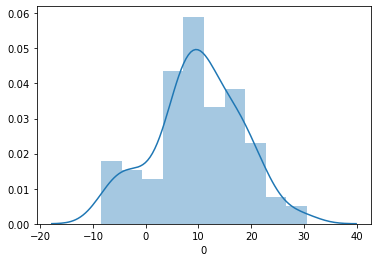

In [526]:
import matplotlib as plt
import seaborn as sns
sns.distplot(my_series.iloc[0,:])

In [508]:
sample_series_1 = np.random.choice(my_series, 20)
sample_series_2 = np.random.choice(my_series, 20)

In [506]:
sample_list = sample_series.tolist()

In [509]:
sample_sub = sample_series_1 - sample_series_1

In [513]:
sample_series_1

array([-1.45808235,  1.33315198,  0.81952972,  1.10356869, -1.14359983,
        2.4154648 , -0.25468176, -0.54941494, -1.21884427, -0.82006377,
        0.45743418,  0.15653659, -0.1514795 , -0.55110059, -1.51791406,
       -0.37427549, -0.80167799,  1.10356869,  1.72310884,  0.41411889])

In [512]:
type(sample_series_1)

numpy.ndarray

In [533]:
s_1 = pd.Series([1,2,3,4,5])
s_2 = pd.Series([6,2,8,9,10])

In [535]:
comp = pd.Series(['same' if x == y else 'diff' for x in s_1 for y in s_2])

comp

In [537]:
df_dict

,Age,Weight,Height,BMI,waist
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [552]:
df_dict.columns.tolist()

['Age', 'Weight', 'Height', 'BMI', 'waist', 'perc']

In [569]:
df_add = pd.DataFrame(np.rint(np.random.rand(10,6)*10), columns = df_dict.columns.tolist())

df_dict = df_dict.append(df_add)
df_dict

,Age,Weight,Height,BMI,waist,perc
0,1.0,2.0,3.0,4.0,5.0,iphone
1,6.0,7.0,8.0,9.0,10.0,android
2,11.0,12.0,13.0,14.0,15.0,android
3,16.0,17.0,18.0,19.0,20.0,android
0,6.0,5.0,10.0,8.0,6.0,9
1,5.0,3.0,6.0,9.0,6.0,7
2,1.0,7.0,10.0,0.0,8.0,7
3,9.0,5.0,5.0,9.0,0.0,3
4,8.0,2.0,2.0,4.0,3.0,1
5,6.0,4.0,1.0,7.0,5.0,5


In [574]:
df_dict['device'] = ['iphone' if x < 5 else ('android' if 5 <= x < 10 else 'Windows') for x in df_dict['Age']]

In [591]:
df_dict.reset_index(inplace= True)

In [620]:

df_dict.groupby('device').agg([np.mean, np.std])

index                  Age               Weight           Height  \
             mean       std       mean       std       mean       std   mean   
device                                                                         
Windows  2.500000  0.707107  13.500000  3.535534  14.500000  3.535534   15.5   
android  3.888889  2.848001   6.777778  1.481366   4.444444  2.743680    5.0   
iphone   3.666667  4.725816   1.333333  0.577350   5.333333  2.886751    5.0   

                         BMI                waist           Growth_Rate  \
              std       mean       std       mean       std        mean   
device                                                                    
Windows  3.535534  16.500000  3.535534  17.500000  3.535534    1.178571   
android  3.278719   6.555556  3.205897   5.000000  3.162278    0.728395   
iphone   4.358899   4.000000  4.000000   5.333333  2.516611    1.000000   

                  Growth_Rate_2      
              std          mean std  
device                               
Windows  0.252538           NaN NaN  
android  0.356211           NaN NaN  
iphone   1.000000           NaN NaN

In [611]:
df_dict

,index,Age,Weight,Height,BMI,waist,device,Growth_Rate,Growth_Rate_2
0,0,1.0,2.0,3.0,4.0,5.0,iphone,1.000000,NaN
1,1,6.0,7.0,8.0,9.0,10.0,android,1.000000,NaN
2,2,11.0,12.0,13.0,14.0,15.0,Windows,1.000000,NaN
3,3,16.0,17.0,18.0,19.0,20.0,Windows,1.357143,NaN
4,0,6.0,5.0,10.0,8.0,6.0,android,0.888889,NaN
5,1,5.0,3.0,6.0,9.0,6.0,android,1.000000,NaN
6,2,1.0,7.0,10.0,0.0,8.0,iphone,0.000000,NaN
7,3,9.0,5.0,5.0,9.0,0.0,android,1.000000,NaN
8,4,8.0,2.0,2.0,4.0,3.0,android,0.444444,NaN
9,5,6.0,4.0,1.0,7.0,5.0,android,0.777778,NaN


In [624]:
df_dict.sort_values(by = ['device','Age','BMI'])

,index,Age,Weight,Height,BMI,waist,device,Growth_Rate,Growth_Rate_2
2,2,11.0,12.0,13.0,14.0,15.0,Windows,1.000000,NaN
3,3,16.0,17.0,18.0,19.0,20.0,Windows,1.357143,NaN
5,1,5.0,3.0,6.0,9.0,6.0,android,1.000000,NaN
12,8,6.0,1.0,4.0,0.0,7.0,android,0.000000,NaN
11,7,6.0,3.0,8.0,4.0,1.0,android,0.444444,NaN
9,5,6.0,4.0,1.0,7.0,5.0,android,0.777778,NaN
4,0,6.0,5.0,10.0,8.0,6.0,android,0.888889,NaN
1,1,6.0,7.0,8.0,9.0,10.0,android,1.000000,NaN
8,4,8.0,2.0,2.0,4.0,3.0,android,0.444444,NaN
7,3,9.0,5.0,5.0,9.0,0.0,android,1.000000,NaN


In [631]:
compare = df_dict.BMI.isnull()

In [632]:
compare

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: BMI, dtype: bool

In [674]:
a = pd.Series([1,2,3,4,5])
type(a)

pandas.core.series.Series

In [675]:
a = a.append(pd.Series([6,7,8,9]))

In [676]:
a

0    1
1    2
2    3
3    4
4    5
0    6
1    7
2    8
3    9
dtype: int64

In [677]:
type(a)

pandas.core.series.Series

In [678]:
a.reset_index(drop = True, inplace = True)

In [679]:
b = a[a > 3]

In [690]:
a

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [673]:
type(a)

pandas.core.series.Series

In [686]:
b = pd.Series(np.rint(np.random.rand(10)*10))

In [687]:
b

0     3.0
1     8.0
2     2.0
3     7.0
4    10.0
5     2.0
6     5.0
7     1.0
8     1.0
9     6.0
dtype: float64

In [688]:
c = a[~a.isin(b)]

In [689]:
c

3    4
8    9
dtype: int64